In [126]:
import pandas as pd
from dfply import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx

In [127]:
df=pd.read_csv("processed.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,CCG_CODE_p,CCG_NAME_p,CCG_ONS_CODE_p,AGE_BAND_p,PATIENT_TYPE_p,POPULATION_p,PATIENTS_SEEN_p,IMD_p,Age_Group_d,Dentist_Count_d
0,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,35-44,27
1,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,45-54,13
2,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,55+,6
3,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,Under 35,28
4,00C,NHS Darlington CCG,E38000042,1,Child,1212.0,4778,25.657,35-44,27


In [128]:
dd=df[['PATIENTS_SEEN_p','POPULATION_p','AGE_BAND_p','PATIENT_TYPE_p','CCG_CODE_p']].drop_duplicates()
sum(dd.duplicated())

0

In [129]:
# dd0=dd[['Age_Group_d','Dentist_Count_d']].groupby('Age_Group_d').sum().reset_index()
# wp={'edgecolor':'w', 'linewidth':2,'width':.25}
# plt.pie(dd0['AGE_BAND_p'],autopct='%1.1f%%',radius=1.1,wedgeprops=wp,labels=['35-44','44-54','55+','Under 35'],shadow=True)
# plt.show()

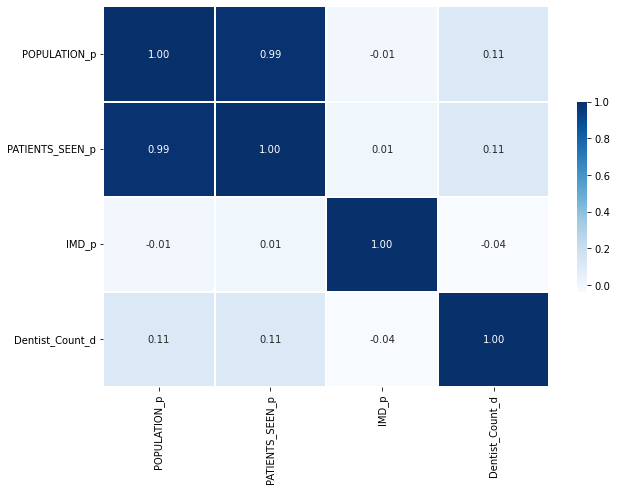

In [130]:
fig=sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues', linewidth=0.1,cbar_kws={"shrink": .5})
fig.figure.set_size_inches(10,7)

# Patterns in Number/Age of Patients treated:

## We analyse Age-Bands of treated patients for children (0 – 17yrs Age) to detect a pattern.

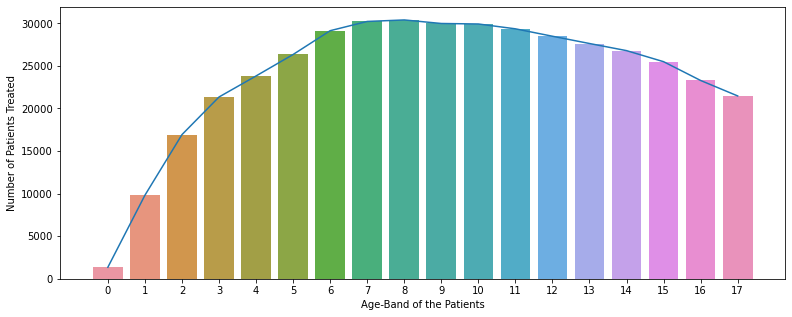

In [131]:
dd0=dd[dd.AGE_BAND_p!='18+']
fig=sns.barplot(y=dd0.PATIENTS_SEEN_p,x=dd0['AGE_BAND_p'].astype('int'),ci=None)
fig=sns.lineplot(y=dd0.PATIENTS_SEEN_p,x=dd0['AGE_BAND_p'].astype('int'),ci=None)
fig.set(ylabel='Number of Patients Treated', xlabel='Age-Band of the Patients')
fig.figure.set_size_inches(13,5)

## We check the percentage of patients treated in for Child and Adult. And we check within each band to get some idea about how patients treated are distributed.

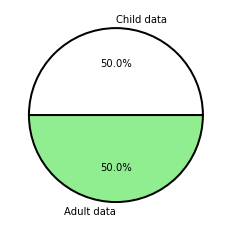

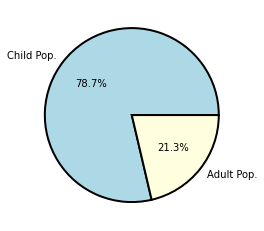

In [132]:
wp={'edgecolor':'black', 'linewidth':2}
dd0=dd[['PATIENT_TYPE_p','POPULATION_p']].groupby('PATIENT_TYPE_p').sum()
plt.pie(dd0.POPULATION_p.value_counts(),colors=['w','lightgreen'],wedgeprops=wp,labels=['Child data','Adult data'],autopct='%1.1f%%')
plt.figure()
plt.pie(dd0['POPULATION_p'],colors=['lightblue','lightyellow'],wedgeprops=wp,labels=['Child Pop.','Adult Pop.'],autopct='%1.1f%%')
plt.show()

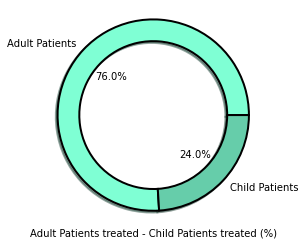

In [133]:
dd0=dd[['PATIENT_TYPE_p','PATIENTS_SEEN_p']].groupby('PATIENT_TYPE_p').sum()
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
plt.pie(dd0.PATIENTS_SEEN_p,colors=['aquamarine','mediumaquamarine'],autopct='%1.1f%%',radius=1.1,labels=['Adult Patients','Child Patients'],wedgeprops=wp,shadow=True)
plt.xlabel("Adult Patients treated - Child Patients treated (%)")
plt.show()

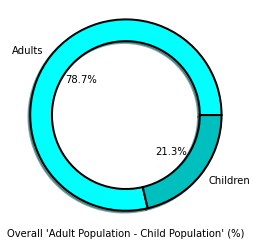

In [134]:
dd0=dd[['PATIENT_TYPE_p','POPULATION_p']].groupby('PATIENT_TYPE_p').sum()
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
plt.pie(dd0.POPULATION_p,colors=['cyan','c'],autopct='%1.1f%%',startangle=-90-180-90,radius=1.1,labels=['Adults','Children'],wedgeprops=wp,shadow=True)
plt.xlabel("Overall 'Adult Population - Child Population' (%)")
plt.show()

_Patterns in Child Patients according to their age:_

Number of patients increase in a linear fashion from 0 to 7 years of age, highest number of patients belong to children of age 7, 8 and 9.

Least number of patients are from the children of age 0 to 2 years of age

the number of patients decreases from 8 years all the way till 17 years again in a slightly linear fashion.

_Patterns for Patients per Population:_
When looking comparing patients per population we find that it follows a similar pattern as that of patients vs age-band except that here we find the patients remain high after the 9 year band and stays high till the 14 years age band before falling down. And then the patients per population are low for the age band 17 and 18+.


_Adult Vs Child:_
18+ more patients than child (GIVE STATS)


In [135]:
def remove_plus(m):
    return m.replace("+","")
dd['AGE_BAND_p']=dd.AGE_BAND_p.apply(remove_plus)

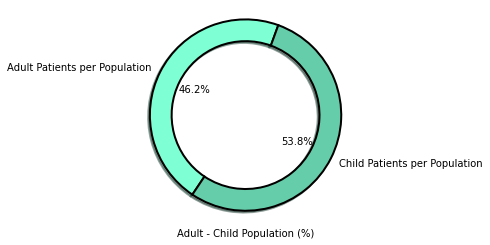

In [136]:
dd0=dd[['PATIENT_TYPE_p','PATIENTS_SEEN_p','POPULATION_p']]
dd0=dd0.groupby('PATIENT_TYPE_p').sum()
dd0['PPP']=dd0['PATIENTS_SEEN_p']/dd0['POPULATION_p']
plt.pie(dd0['PPP'],colors=['aquamarine','mediumaquamarine'],startangle=70,autopct='%1.1f%%',radius=1.1,labels=[f"{x} Patients per Population" for x in dd0.index],wedgeprops=wp,shadow=True)
plt.xlabel('Adult - Child Population (%)')
plt.show()

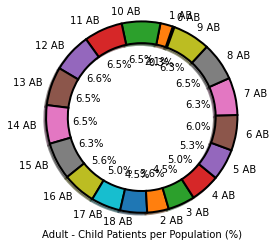

In [137]:
dd1=dd[['AGE_BAND_p','PATIENTS_SEEN_p','POPULATION_p']]
dd1=dd1.groupby('AGE_BAND_p').sum()
dd1['PPP_BY_AGEBAND']=dd1['PATIENTS_SEEN_p']/dd1['POPULATION_p']
plt.pie(dd1['PPP_BY_AGEBAND'],startangle=70,autopct='%1.1f%%',radius=1.1,labels=[f"{x} AB" for x in dd1.index],wedgeprops=wp,shadow=True)
plt.xlabel('Adult - Child Patients per Population (%)')
plt.show()

In [138]:
dd1=dd1.reset_index()
dd1.head()

,AGE_BAND_p,PATIENTS_SEEN_p,POPULATION_p,PPP_BY_AGEBAND
0,0,259441,653467.0,0.397022
1,1,1873864,674807.0,2.776889
2,10,5714835,667818.0,8.557474
3,11,5606352,654366.0,8.567609
4,12,5439992,627407.0,8.670595


## Patients treated per Population comparison for different Age Bands.

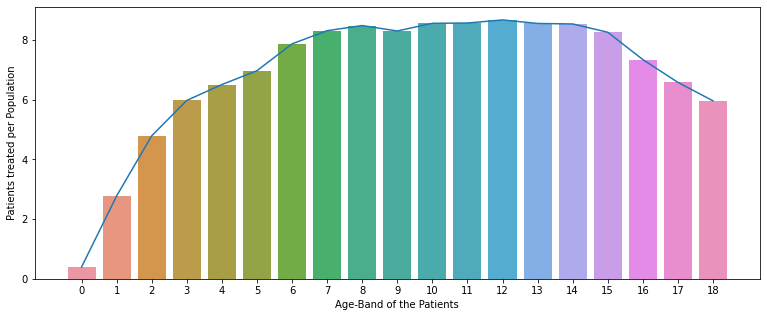

In [139]:
fig=sns.barplot(y=dd1.PPP_BY_AGEBAND,x=dd1.AGE_BAND_p.astype('int'))
fig=sns.lineplot(y=dd1.PPP_BY_AGEBAND,x=dd1.AGE_BAND_p.astype('int'))
fig.set(ylabel='Patients treated per Population', xlabel='Age-Band of the Patients')
fig.figure.set_size_inches(13,5)


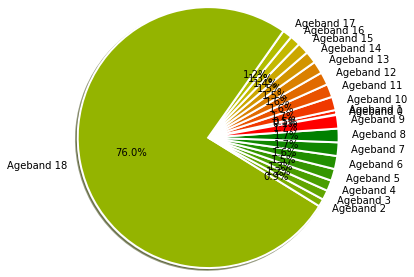

In [140]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),18))
colors = [color.rgb for color in colors]
dd0=dd[['AGE_BAND_p','PATIENTS_SEEN_p']].groupby('AGE_BAND_p').sum()
wp={'edgecolor':'w', 'linewidth':2}
plt.show()
plt.pie(dd0['PATIENTS_SEEN_p'],startangle=10,colors=colors,labels=[f"Ageband {i}" for i in dd0.index],autopct='%1.1f%%',radius=1.5,wedgeprops=wp,shadow=True)
plt.show()

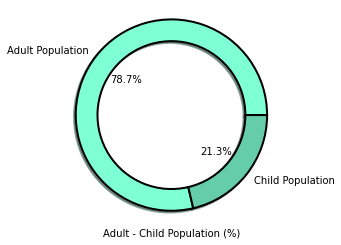

In [141]:
dd0=dd.groupby('PATIENT_TYPE_p').sum()
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
plt.pie(dd0['POPULATION_p'],colors=['aquamarine','mediumaquamarine'],autopct='%1.1f%%',radius=1.1,labels=[f"{x} Population" for x in dd0.index],wedgeprops=wp,shadow=True)
plt.xlabel('Adult - Child Population (%)')
plt.show()

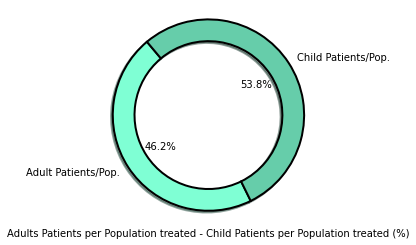

In [143]:
dd0=dd.groupby('PATIENT_TYPE_p').sum()
dd0['PPP']=dd0['PATIENTS_SEEN_p']/dd0['POPULATION_p']
wp={'edgecolor':'black', 'linewidth':2,'width':.25}
plt.pie(dd0['PPP'],colors=['aquamarine','mediumaquamarine'],startangle=130,autopct='%1.1f%%',radius=1.1,labels=[f"{x} Patients/Pop." for x in dd0.index],wedgeprops=wp,shadow=True)
plt.xlabel('Adults Patients per Population treated - Child Patients per Population treated (%)')
plt.show()

## Understanding IMD, finding a relationship between Deprivation and Number of Patients

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


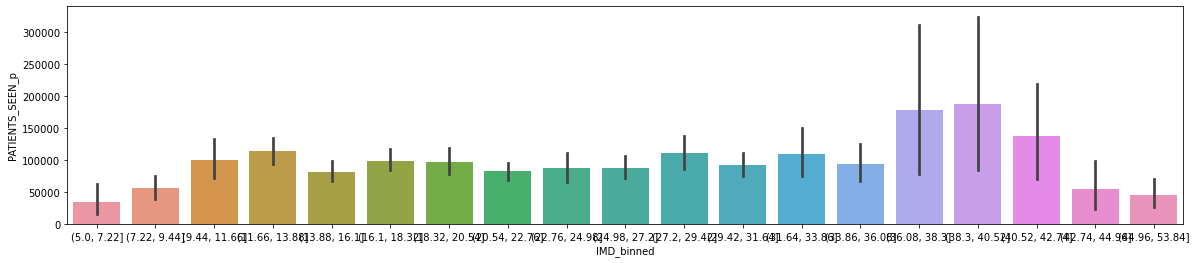

In [144]:
bins = [5.00,7.22, 9.44, 11.66, 13.88, 16.10,18.32, 20.54 ,22.76, 24.98, 27.20,
29.42, 31.64, 33.86, 36.08, 38.30, 40.52, 42.74, 44.96, 53.84]

df['IMD_binned'] = pd.cut(df['IMD_p'], bins)
fig=sns.barplot(df.IMD_binned,df.PATIENTS_SEEN_p)

fig.figure.set_size_inches(20,4)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


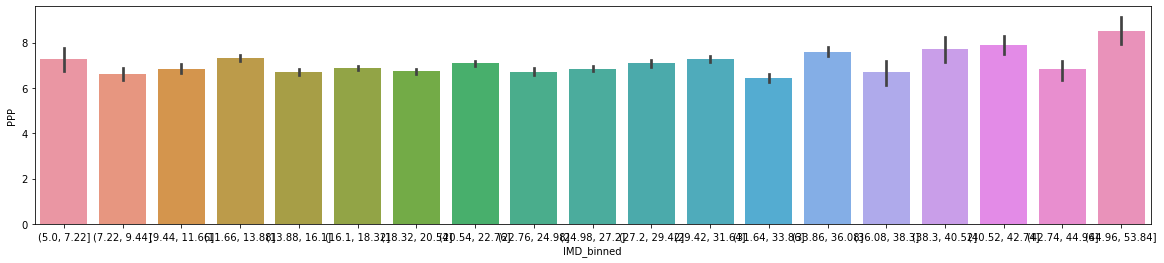

In [145]:
df['IMD_binned'] = pd.cut(df['IMD_p'], bins)
df['PPP']=df['PATIENTS_SEEN_p']/df['POPULATION_p']
fig=sns.barplot(df.IMD_binned,df.PPP)

fig.figure.set_size_inches(20,4)

In [146]:
df['Dentists_per_population']=df['Dentist_Count_d']/df['POPULATION_p']
df.head()

,CCG_CODE_p,CCG_NAME_p,CCG_ONS_CODE_p,AGE_BAND_p,PATIENT_TYPE_p,POPULATION_p,PATIENTS_SEEN_p,IMD_p,Age_Group_d,Dentist_Count_d,IMD_binned,PPP,Dentists_per_population
0,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,35-44,27,"(24.98, 27.2]",0.550269,0.024237
1,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,45-54,13,"(24.98, 27.2]",0.550269,0.011670
2,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,55+,6,"(24.98, 27.2]",0.550269,0.005386
3,00C,NHS Darlington CCG,E38000042,0,Child,1114.0,613,25.657,Under 35,28,"(24.98, 27.2]",0.550269,0.025135
4,00C,NHS Darlington CCG,E38000042,1,Child,1212.0,4778,25.657,35-44,27,"(24.98, 27.2]",3.942244,0.022277


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


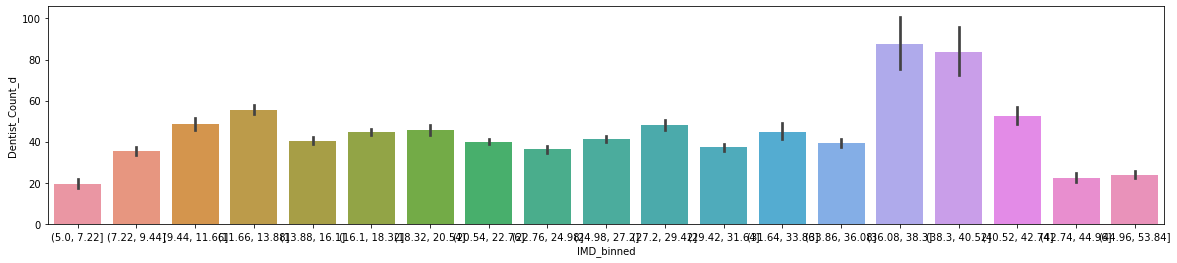

In [147]:
fig=sns.barplot(df['IMD_binned'],df['Dentist_Count_d'])
fig.figure.set_size_inches(20,4)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


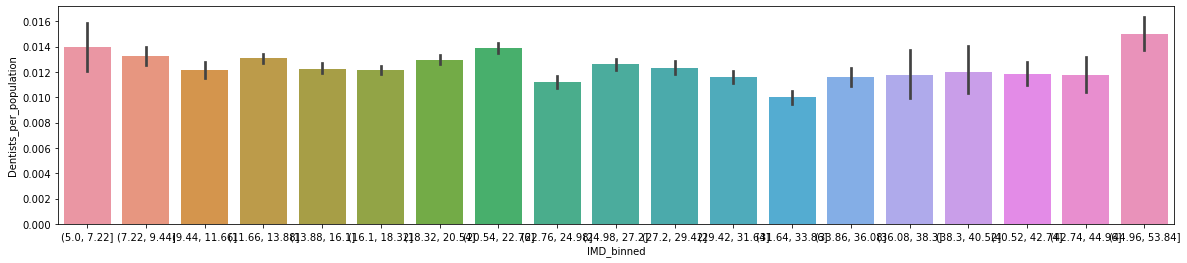

In [148]:
fig=sns.barplot(df['IMD_binned'],df['Dentists_per_population'])
fig.figure.set_size_inches(20,4)

In [150]:
d0=df[['PATIENTS_SEEN_p','POPULATION_p','AGE_BAND_p','PATIENT_TYPE_p','CCG_CODE_p','IMD_p']].drop_duplicates()
sum(d0.duplicated())

0

In [151]:
bins = [5.00,7.22, 9.44, 11.66, 13.88, 16.10,18.32, 20.54 ,22.76, 24.98, 27.20,
29.42, 31.64, 33.86, 36.08, 38.30, 40.52, 42.74, 44.96, 53.84]

d0['IMD_binned'] = pd.cut(d0['IMD_p'], bins)
d0.head()

,PATIENTS_SEEN_p,POPULATION_p,AGE_BAND_p,PATIENT_TYPE_p,CCG_CODE_p,IMD_p,IMD_binned
0,613,1114.0,0,Child,00C,25.657,"(24.98, 27.2]"
4,4778,1212.0,1,Child,00C,25.657,"(24.98, 27.2]"
8,12148,1269.0,10,Child,00C,25.657,"(24.98, 27.2]"
12,11120,1328.0,11,Child,00C,25.657,"(24.98, 27.2]"
16,12114,1218.0,12,Child,00C,25.657,"(24.98, 27.2]"


In [152]:
d0=d0[['PATIENTS_SEEN_p','POPULATION_p','IMD_p','CCG_CODE_p']].groupby(['CCG_CODE_p','IMD_p']).sum().reset_index()
d0['PPP']=d0['PATIENTS_SEEN_p']/d0['POPULATION_p']
d0

,CCG_CODE_p,IMD_p,PATIENTS_SEEN_p,POPULATION_p,PPP
0,00C,25.657,756540,106347.0,7.113882
1,00D,31.361,1766212,274561.0,6.432858
2,00J,21.682,1576220,249101.0,6.327634
3,00K,28.774,1943208,289506.0,6.712151
4,00L,22.079,2202725,319030.0,6.904445
...,...,...,...,...,...
186,99H,8.632,1452535,291545.0,4.982198
187,99J,13.496,2252076,485774.0,4.636057
188,99K,13.019,1066124,173788.0,6.134624
189,99M,10.400,1341827,211333.0,6.349349


In [153]:
from statistics import mean
import numpy as np

xs = d0.IMD_p.values
ys = d0.PPP.values

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

regression_line = [(m*x)+b for x in xs]
print(m,b)

0.046738657330810056 5.228941027244632


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Number of Patients seen/treated'),
 Text(0.5, 0, 'IMD - Average score')]

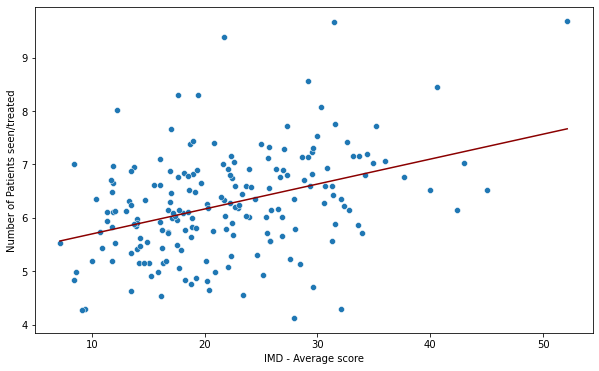

In [154]:
# fig=sns.barplot(d0.IMD_p,d0.PPP)
import matplotlib
from seaborn import regplot
fig=sns.scatterplot(d0.IMD_p,d0.PPP)
fig=sns.lineplot(xs, regression_line, color='darkred')
fig.figure.set_size_inches(10,6)
matplotlib.rc_file_defaults
fig.set(ylabel='Number of Patients seen/treated', xlabel='IMD - Average score')

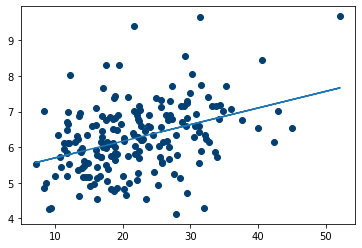

In [155]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

In [156]:
dfa=df[['CCG_ONS_CODE_p','Dentist_Count_d','Age_Group_d']]
dfa=dfa.drop_duplicates()
dfa.head(2)

dfa1=dfa.groupby(['Age_Group_d']).sum().reset_index()
dfa1

,Age_Group_d,Dentist_Count_d
0,35-44,9656
1,45-54,6171
2,55+,4192
3,Under 35,13286


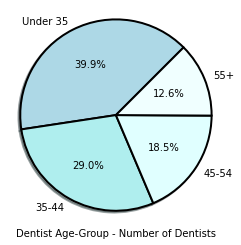

In [157]:
dfa1=dfa1.sort_values('Dentist_Count_d',ascending=False)

wp={'edgecolor':'black', 'linewidth':2}
plt.pie(dfa1['Dentist_Count_d'],startangle=45,colors=['lightblue','paleturquoise','lightcyan','azure'],autopct='%1.1f%%',radius=1.1,labels=dfa1.Age_Group_d,wedgeprops=wp,shadow=True)
plt.xlabel('Dentist Age-Group - Number of Dentists')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


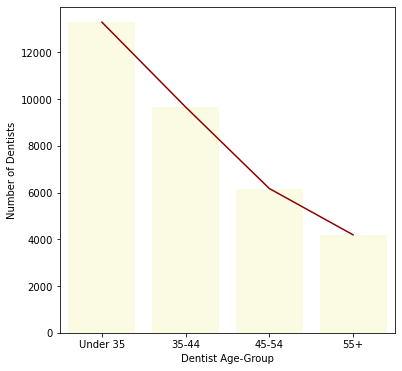

In [158]:
fig=sns.lineplot(dfa1.Age_Group_d,dfa1.Dentist_Count_d,color='darkred')
fig=sns.barplot(dfa1.Age_Group_d,dfa1.Dentist_Count_d,color='lightyellow')
fig.set(ylabel='Number of Dentists', xlabel='Dentist Age-Group')
fig.figure.set_size_inches(6,6)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


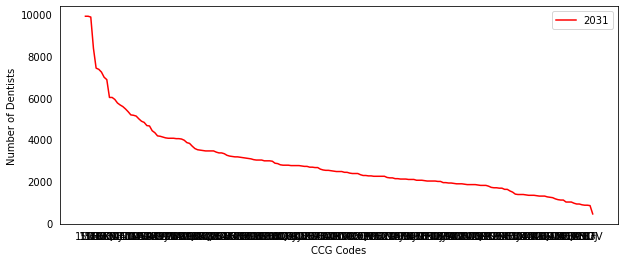

In [162]:
df8=df[df['Age_Group_d']!='55+']
df8=df8.drop_duplicates()
df82=df8.groupby('CCG_CODE_p').sum().reset_index()

df82=df82.sort_values('Dentist_Count_d',ascending=False)
# fig=sns.barplot(df92.CCG_CODE_p,df92.Dentist_Count_d)
df82=df82[df82['Dentist_Count_d']>250]

df9=df[['CCG_CODE_p','Dentist_Count_d']]
df9=df9.drop_duplicates()
df92=df9.groupby('CCG_CODE_p').sum().reset_index()

df92=df92.sort_values('Dentist_Count_d',ascending=False)

fig=sns.lineplot(df82.CCG_CODE_p,df82.Dentist_Count_d,color='red')

fig.set(ylabel='Number of Dentists', xlabel='CCG Codes')
fig.figure.set_size_inches(10,4)
fig.tick_params(left=False,bottom=False,right=False,top=False)
fig.legend(['2031', '2019'])
plt.show()
# fig.show()